<a href="https://colab.research.google.com/github/VirenderTanwar/Machine-Learning-with-Python/blob/master/Image_Captioning_V_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x

In [4]:
!wget https://www.dropbox.com/sh/q4dehgdtbo0b6vt/AADbtOap384mNYeFkjZWkOhba/Flicker8k_Dataset?dl=0

--2020-02-09 04:23:29--  https://www.dropbox.com/sh/q4dehgdtbo0b6vt/AADbtOap384mNYeFkjZWkOhba/Flicker8k_Dataset?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/q4dehgdtbo0b6vt/AADbtOap384mNYeFkjZWkOhba/Flicker8k_Dataset [following]
--2020-02-09 04:23:29--  https://www.dropbox.com/sh/raw/q4dehgdtbo0b6vt/AADbtOap384mNYeFkjZWkOhba/Flicker8k_Dataset
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7f6edd63a9e41b05eac6fd74d9.dl.dropboxusercontent.com/zip_download_get/AVLxuSsNVu4GFzPLRHVSA9TlOqp28egxMap8QUas_mhuwKZql88kJF2KdWHGqGI63YkZKXLMWtXkbZ5oifTROaRRYbzbnP64tkTe0YZlCNFo6A [following]
--2020-02-09 04:23:33--  https://uc7f6edd63a9e41b05eac6fd74d9.dl.dropboxusercontent.com/zip_download_get/AVLxuSsNVu4GFzPLRHVSA9TlOqp28e

In [5]:
!wget https://www.dropbox.com/sh/q4dehgdtbo0b6vt/AACUf5EQ7RoX3ZcUzsblbGJla/Flickr8k_text?dl=0

--2020-02-09 04:35:14--  https://www.dropbox.com/sh/q4dehgdtbo0b6vt/AACUf5EQ7RoX3ZcUzsblbGJla/Flickr8k_text?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/q4dehgdtbo0b6vt/AACUf5EQ7RoX3ZcUzsblbGJla/Flickr8k_text [following]
--2020-02-09 04:35:15--  https://www.dropbox.com/sh/raw/q4dehgdtbo0b6vt/AACUf5EQ7RoX3ZcUzsblbGJla/Flickr8k_text
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb6929a7aaa6cf661e2a7a62f74.dl.dropboxusercontent.com/zip_download_get/AVJY7xgzXe6LhV6S10L1cghDqY-kEooPKQM0j6WZ7nZUzsTM2YDLiCjDI3oKnxGIV01yTC9Q0XmNo4oZtdtZ-TeVlzzUGt0qJ0ObRDGD8InNYg [following]
--2020-02-09 04:35:15--  https://ucb6929a7aaa6cf661e2a7a62f74.dl.dropboxusercontent.com/zip_download_get/AVJY7xgzXe6LhV6S10L1cghDqY-kEooPKQM0j6WZ7n

In [6]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2020-02-09 04:35:17--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-02-09 04:35:18--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-02-09 04:35:18--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [7]:
ls

 data/                    'Flickr8k_text?dl=0'   sample_data/
'Flicker8k_Dataset?dl=0'   glove.6B.zip


In [0]:
import os

os.makedirs('Flicker8k_Dataset')

os.makedirs('Flickr8k_text')

os.makedirs('glove.6B')

In [9]:
!unzip 'Flicker8k_Dataset?dl=0' -d 'Flicker8k_Dataset'

!unzip 'Flickr8k_text?dl=0' -d 'Flickr8k_text'

!unzip 'glove.6B.zip' -d 'glove.6B'

Archive:  Flicker8k_Dataset?dl=0
mapname:  conversion of  failed
 extracting: Flicker8k_Dataset/667626_18933d713e.jpg  
 extracting: Flicker8k_Dataset/3637013_c675de7705.jpg  
 extracting: Flicker8k_Dataset/61209225_8512e1dad5.jpg  
 extracting: Flicker8k_Dataset/84713990_d3f3cef78b.jpg  
 extracting: Flicker8k_Dataset/58368365_03ed3e5bdf.jpg  
 extracting: Flicker8k_Dataset/10815824_2997e03d76.jpg  
 extracting: Flicker8k_Dataset/23445819_3a458716c1.jpg  
 extracting: Flicker8k_Dataset/69710411_2cf537f61f.jpg  
 extracting: Flicker8k_Dataset/50030244_02cd4de372.jpg  
 extracting: Flicker8k_Dataset/95734038_2ab5783da7.jpg  
 extracting: Flicker8k_Dataset/69710415_5c2bfb1058.jpg  
 extracting: Flicker8k_Dataset/47871819_db55ac4699.jpg  
 extracting: Flicker8k_Dataset/55135290_9bed5c4ca3.jpg  
 extracting: Flicker8k_Dataset/95783195_e1ba3f57ca.jpg  
 extracting: Flicker8k_Dataset/58363930_0544844edd.jpg  
 extracting: Flicker8k_Dataset/57417274_d55d34e93e.jpg  
 extracting: Flicker8k_Dat

In [0]:
!rm 'Flicker8k_Dataset?dl=0'
!rm 'Flickr8k_text?dl=0'
!rm 'glove.6B.zip'

In [0]:
import os
import string
import glob
from tensorflow.keras.applications import MobileNet
import tensorflow.keras.applications.mobilenet  

from tensorflow.keras.applications.inception_v3 import InceptionV3
import tensorflow.keras.applications.inception_v3


from tqdm import tqdm
import tensorflow.keras.preprocessing.image
import pickle
from time import time
import numpy as np
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, TimeDistributed, Dense, RepeatVector,\
                         Activation, Flatten, Reshape, concatenate, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import Input, layers
from tensorflow.keras import optimizers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

from tensorflow.keras.layers import add
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

START = "startseq"
STOP = "endseq"
EPOCHS = 10
USE_INCEPTION = True

In [0]:
root_captioning='/content'

In [0]:
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return f"{h}:{m:>02}:{s:>05.2f}"

In [0]:
null_punct = str.maketrans('', '', string.punctuation)
lookup = dict()

with open( os.path.join(root_captioning,'Flickr8k_text','Flickr8k.token.txt'), 'r') as fp:
  
  max_length = 0
  for line in fp.read().split('\n'):
    tok = line.split()
    if len(line) >= 2:
      id = tok[0].split('.')[0]
      desc = tok[1:]
      
      # Cleanup description
      desc = [word.lower() for word in desc]
      desc = [w.translate(null_punct) for w in desc]
      desc = [word for word in desc if len(word)>1]
      desc = [word for word in desc if word.isalpha()]
      max_length = max(max_length,len(desc))
      
      if id not in lookup:
        lookup[id] = list()
      lookup[id].append(' '.join(desc))
      
lex = set()
for key in lookup:
  [lex.update(d.split()) for d in lookup[key]]

In [15]:
print(len(lookup)) 
print(len(lex)) 
print(max_length)

8092
8763
32


In [0]:
img = glob.glob(os.path.join(root_captioning,'Flicker8k_Dataset', '*.jpg'))

In [17]:
img[:10]

['/content/Flicker8k_Dataset/3394586927_eae7732b64.jpg',
 '/content/Flicker8k_Dataset/3301438465_10121a2412.jpg',
 '/content/Flicker8k_Dataset/2455528149_6c3477fd33.jpg',
 '/content/Flicker8k_Dataset/533713007_bf9f3e25b4.jpg',
 '/content/Flicker8k_Dataset/496380034_d22aeeedb3.jpg',
 '/content/Flicker8k_Dataset/191003284_1025b0fb7d.jpg',
 '/content/Flicker8k_Dataset/3488512097_e500cb499f.jpg',
 '/content/Flicker8k_Dataset/2346189044_546ed84aa9.jpg',
 '/content/Flicker8k_Dataset/2520909293_9bb7f7364e.jpg',
 '/content/Flicker8k_Dataset/2538477523_1da77eb11c.jpg']

In [0]:
train_images_path = os.path.join(root_captioning,'Flickr8k_text','Flickr_8k.trainImages.txt') 
train_images = set(open(train_images_path, 'r').read().strip().split('\n'))
test_images_path = os.path.join(root_captioning,'Flickr8k_text','Flickr_8k.testImages.txt') 
test_images = set(open(test_images_path, 'r').read().strip().split('\n'))

train_img = []
test_img = []

for i in img:
  f = os.path.split(i)[-1]
  if f in train_images: 
    train_img.append(f) 
  elif f in test_images:
    test_img.append(f)

In [0]:
train_descriptions = {k:v for k,v in lookup.items() if f'{k}.jpg' in train_images}
for n,v in train_descriptions.items(): 
  for d in range(len(v)):
    v[d] = f'{START} {v[d]} {STOP}'

In [20]:
if USE_INCEPTION:
  encode_model = InceptionV3(weights='imagenet')
  encode_model = Model(encode_model.input, encode_model.layers[-2].output)
  WIDTH = 299
  HEIGHT = 299
  OUTPUT_DIM = 2048
  preprocess_input = tensorflow.keras.applications.inception_v3.preprocess_input
else:
  encode_model = MobileNet(weights='imagenet',include_top=False)
  WIDTH = 224
  HEIGHT = 224
  OUTPUT_DIM = 50176
  preprocess_input = tensorflow.keras.applications.mobilenet.preprocess_input

96116736/96112376 [==============================] - 1s 0us/step


In [21]:
encode_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [0]:
def encodeImage(img):
  img = img.resize((WIDTH, HEIGHT))
  
  x = tensorflow.keras.preprocessing.image.img_to_array(img)
  
  x = np.expand_dims(x, axis=0)
  
  x = preprocess_input(x)
  
  x = encode_model.predict(x) # Get the encoding vector for the image
  x = np.reshape(x, OUTPUT_DIM )
  
  return x

In [23]:
train_path = os.path.join(root_captioning,"data",f'train{OUTPUT_DIM}.pkl')
if not os.path.exists(train_path):
  start = time()
  encoding_train = {}
  for id in tqdm(train_img):
    image_path = os.path.join(root_captioning,'Flicker8k_Dataset', id)
    img = tensorflow.keras.preprocessing.image.load_img(image_path, target_size=(HEIGHT, WIDTH))
    encoding_train[id] = encodeImage(img)
  with open(train_path, "wb") as fp:
    pickle.dump(encoding_train, fp)
  print(f"\nGenerating training set took: {hms_string(time()-start)}")
else:
  with open(train_path, "rb") as fp:
    encoding_train = pickle.load(fp)

100%|██████████| 6000/6000 [06:40<00:00, 15.55it/s]



Generating training set took: 0:06:41.05


In [24]:
test_path = os.path.join(root_captioning,"data",f'test{OUTPUT_DIM}.pkl')
if not os.path.exists(test_path):
  start = time()
  encoding_test = {}
  for id in tqdm(test_img):
    image_path = os.path.join(root_captioning,'Flicker8k_Dataset', id)
    img = tensorflow.keras.preprocessing.image.load_img(image_path, target_size=(HEIGHT, WIDTH))
    encoding_test[id] = encodeImage(img)
  with open(test_path, "wb") as fp:
    pickle.dump(encoding_test, fp)
  print(f"\nGenerating testing set took: {hms_string(time()-start)}")
else:
  with open(test_path, "rb") as fp:
    encoding_test = pickle.load(fp)

100%|██████████| 1000/1000 [01:05<00:00, 15.12it/s]


Generating testing set took: 0:01:05.89


In [25]:
all_train_captions = []
for key, val in train_descriptions.items():
    for cap in val:
        all_train_captions.append(cap)
len(all_train_captions)

30000

In [26]:
word_count_threshold = 10
word_counts = {}
nsents = 0
for sent in all_train_captions:
    nsents += 1
    for w in sent.split(' '):
        word_counts[w] = word_counts.get(w, 0) + 1

vocab = [w for w in word_counts if word_counts[w] >= word_count_threshold]
print('preprocessed words %d ==> %d' % (len(word_counts), len(vocab)))

preprocessed words 7578 ==> 1651


In [27]:
idxtoword = {}
wordtoidx = {}

ix = 1
for w in vocab:
    wordtoidx[w] = ix
    idxtoword[ix] = w
    ix += 1
    
vocab_size = len(idxtoword) + 1 
vocab_size

1652

In [28]:
max_length +=2
print(max_length)

34


In [0]:
def data_generator(descriptions, photos, wordtoidx, max_length, num_photos_per_batch):
  # x1 - Training data for photos
  # x2 - The caption that goes with each photo
  # y - The predicted rest of the caption
  x1, x2, y = [], [], []
  n=0
  while True:
    for key, desc_list in descriptions.items():
      n+=1
      photo = photos[key+'.jpg']
      # Each photo has 5 descriptions
      for desc in desc_list:
        # Convert each word into a list of sequences.
        seq = [wordtoidx[word] for word in desc.split(' ') if word in wordtoidx]
        # Generate a training case for every possible sequence and outcome
        for i in range(1, len(seq)):
          in_seq, out_seq = seq[:i], seq[i]
          in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
          out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
          x1.append(photo)
          x2.append(in_seq)
          y.append(out_seq)
      if n==num_photos_per_batch:
        yield ([np.array(x1), np.array(x2)], np.array(y))
        x1, x2, y = [], [], []
        n=0

In [30]:
glove_dir = os.path.join(root_captioning,'glove.6B')
embeddings_index = {} 
f = open(os.path.join(glove_dir, 'glove.6B.200d.txt'), encoding="utf-8")

for line in tqdm(f):
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs

f.close()
print(f'Found {len(embeddings_index)} word vectors.')

400000it [00:19, 20390.01it/s]

Found 400000 word vectors.


In [0]:
embedding_dim = 200

embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in wordtoidx.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [0]:
inputs1 = Input(shape=(OUTPUT_DIM,))
fe1 = Dropout(0.5)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, embedding_dim, mask_zero=True)(inputs2)
se2 = Dropout(0.5)(se1)
se3 = LSTM(256)(se2)
decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)
caption_model = Model(inputs=[inputs1, inputs2], outputs=outputs)

In [33]:
caption_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 34)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 2048)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 34, 200)      330400      input_3[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 2048)         0           input_2[0][0]                    
____________________________________________________________________________________________

In [0]:
caption_model.layers[2].set_weights([embedding_matrix])
caption_model.layers[2].trainable = False
caption_model.compile(loss='categorical_crossentropy', optimizer='adam')

In [0]:
number_pics_per_bath = 3
steps = len(train_descriptions)//number_pics_per_bath

In [36]:
model_path = os.path.join(root_captioning,"data",f'caption-model.hdf5')
if not os.path.exists(model_path):
  for i in tqdm(range(EPOCHS*2)):
      generator = data_generator(train_descriptions, encoding_train, wordtoidx, max_length, number_pics_per_bath)
      caption_model.fit_generator(generator, epochs=1, steps_per_epoch=steps, verbose=1)

  caption_model.optimizer.lr = 1e-4
  number_pics_per_bath = 6
  steps = len(train_descriptions)//number_pics_per_bath

  for i in range(EPOCHS):
      generator = data_generator(train_descriptions, encoding_train, wordtoidx, max_length, number_pics_per_bath)
      caption_model.fit_generator(generator, epochs=1, steps_per_epoch=steps, verbose=1)  
  caption_model.save_weights(model_path)
  print(f"\Training took: {hms_string(time()-start)}")
else:
  caption_model.load_weights(model_path)

  0%|          | 0/20 [00:00<?, ?it/s]

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 2000 steps
2000/2000 [==============================] - 101s 50ms/step - loss: 4.1181


  5%|▌         | 1/20 [01:40<31:56, 100.89s/it]

  ...
    to  
  ['...']
Train for 2000 steps
2000/2000 [==============================] - 98s 49ms/step - loss: 3.4170


 10%|█         | 2/20 [03:19<30:03, 100.18s/it]

  ...
    to  
  ['...']
Train for 2000 steps
2000/2000 [==============================] - 100s 50ms/step - loss: 3.1972


 15%|█▌        | 3/20 [04:59<28:20, 100.01s/it]

  ...
    to  
  ['...']
Train for 2000 steps
2000/2000 [==============================] - 99s 50ms/step - loss: 3.0630


 20%|██        | 4/20 [06:38<26:37, 99.83s/it] 

  ...
    to  
  ['...']
Train for 2000 steps
2000/2000 [==============================] - 99s 50ms/step - loss: 2.9676


 25%|██▌       | 5/20 [08:17<24:56, 99.74s/it]

  ...
    to  
  ['...']
Train for 2000 steps
2000/2000 [==============================] - 99s 50ms/step - loss: 2.8933


 30%|███       | 6/20 [09:57<23:14, 99.58s/it]

  ...
    to  
  ['...']
Train for 2000 steps
2000/2000 [==============================] - 100s 50ms/step - loss: 2.8377


 35%|███▌      | 7/20 [11:36<21:34, 99.60s/it]

  ...
    to  
  ['...']
Train for 2000 steps
2000/2000 [==============================] - 98s 49ms/step - loss: 2.7891


 40%|████      | 8/20 [13:15<19:50, 99.23s/it]

  ...
    to  
  ['...']
Train for 2000 steps
2000/2000 [==============================] - 99s 49ms/step - loss: 2.7477


 45%|████▌     | 9/20 [14:54<18:10, 99.12s/it]

  ...
    to  
  ['...']
Train for 2000 steps
2000/2000 [==============================] - 99s 49ms/step - loss: 2.7150


 50%|█████     | 10/20 [16:32<16:30, 99.00s/it]

  ...
    to  
  ['...']
Train for 2000 steps
2000/2000 [==============================] - 98s 49ms/step - loss: 2.6836


 55%|█████▌    | 11/20 [18:10<14:48, 98.74s/it]

  ...
    to  
  ['...']
Train for 2000 steps
2000/2000 [==============================] - 98s 49ms/step - loss: 2.6556


 60%|██████    | 12/20 [19:49<13:09, 98.63s/it]

  ...
    to  
  ['...']
Train for 2000 steps
2000/2000 [==============================] - 99s 49ms/step - loss: 2.6348


 65%|██████▌   | 13/20 [21:28<11:31, 98.73s/it]

  ...
    to  
  ['...']
Train for 2000 steps
2000/2000 [==============================] - 98s 49ms/step - loss: 2.6123


 70%|███████   | 14/20 [23:06<09:51, 98.63s/it]

  ...
    to  
  ['...']
Train for 2000 steps
2000/2000 [==============================] - 98s 49ms/step - loss: 2.5970


 75%|███████▌  | 15/20 [24:44<08:12, 98.51s/it]

  ...
    to  
  ['...']
Train for 2000 steps
2000/2000 [==============================] - 98s 49ms/step - loss: 2.5753


 80%|████████  | 16/20 [26:22<06:33, 98.34s/it]

  ...
    to  
  ['...']
Train for 2000 steps
2000/2000 [==============================] - 98s 49ms/step - loss: 2.5603


 85%|████████▌ | 17/20 [28:01<04:55, 98.35s/it]

  ...
    to  
  ['...']
Train for 2000 steps
2000/2000 [==============================] - 98s 49ms/step - loss: 2.5518


 90%|█████████ | 18/20 [29:39<03:16, 98.32s/it]

  ...
    to  
  ['...']
Train for 2000 steps
2000/2000 [==============================] - 102s 51ms/step - loss: 2.5327


 95%|█████████▌| 19/20 [31:21<01:39, 99.44s/it]

  ...
    to  
  ['...']
Train for 2000 steps
2000/2000 [==============================] - 101s 51ms/step - loss: 2.5231


100%|██████████| 20/20 [33:02<00:00, 99.94s/it]

  ...
    to  
  ['...']
Train for 1000 steps
   2/1000 [..............................] - ETA: 1:14 - loss: 2.4796

1000/1000 [==============================] - 57s 57ms/step - loss: 2.4973
  ...
    to  
  ['...']
Train for 1000 steps
1000/1000 [==============================] - 58s 58ms/step - loss: 2.4478
  ...
    to  
  ['...']
Train for 1000 steps
1000/1000 [==============================] - 56s 56ms/step - loss: 2.4314
  ...
    to  
  ['...']
Train for 1000 steps
1000/1000 [==============================] - 56s 56ms/step - loss: 2.4192
  ...
    to  
  ['...']
Train for 1000 steps
1000/1000 [==============================] - 59s 59ms/step - loss: 2.4044
  ...
    to  
  ['...']
Train for 1000 steps
1000/1000 [==============================] - 60s 60ms/step - loss: 2.3995
  ...
    to  
  ['...']
Train for 1000 steps
1000/1000 [==============================] - 58s 58ms/step - loss: 2.3902
  ...
    to  
  ['...']
Train for 1000 steps
1000/1000 [==============================] - 57s 57ms/step - loss: 2.3835
  ...
    to  
  ['...']
Train for 1000 steps
1000/1000 [=============================

In [0]:
def generateCaption(photo):
    in_text = START
    for i in range(max_length):
        sequence = [wordtoidx[w] for w in in_text.split() if w in wordtoidx]
        sequence = pad_sequences([sequence], maxlen=max_length)
        yhat = caption_model.predict([photo,sequence], verbose=0)
        yhat = np.argmax(yhat)
        word = idxtoword[yhat]
        in_text += ' ' + word
        if word == STOP:
            break
    final = in_text.split()
    final = final[1:-1]
    final = ' '.join(final)
    return final

/content/Flicker8k_Dataset/1764955991_5e53a28c87.jpg


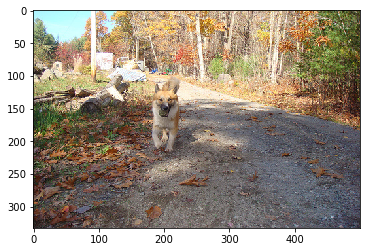

Caption: dog is running on the grass
_____________________________________
/content/Flicker8k_Dataset/241347760_d44c8d3a01.jpg


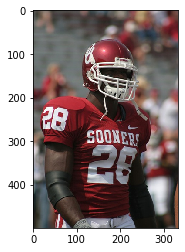

Caption: football player in red uniform is making to make the ball
_____________________________________
/content/Flicker8k_Dataset/2922973230_5a769ef92a.jpg


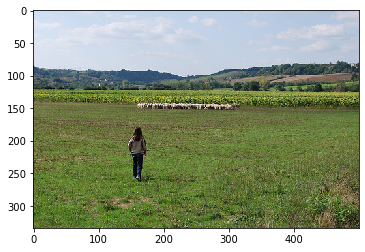

Caption: man in white shirt and blue hat is standing on top of mountain
_____________________________________
/content/Flicker8k_Dataset/3411393875_a9ff73c67a.jpg


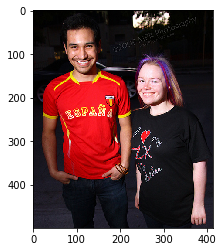

Caption: woman with black hair and red sweater is smiling whilst standing in front of crowd of people
_____________________________________
/content/Flicker8k_Dataset/2707873672_15e6b5d54b.jpg


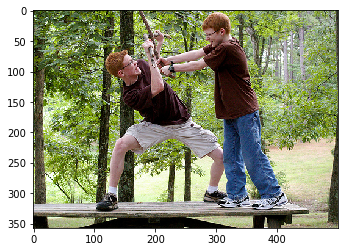

Caption: boy in red shirt and shorts is jumping on trampoline
_____________________________________
/content/Flicker8k_Dataset/2706766641_a9df81969d.jpg


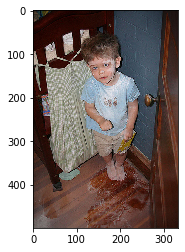

Caption: little boy in red shirt is playing with red ball
_____________________________________
/content/Flicker8k_Dataset/3125309108_1011486589.jpg


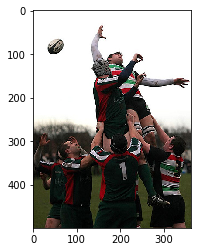

Caption: two men in uniform are playing rugby
_____________________________________
/content/Flicker8k_Dataset/2021613437_d99731f986.jpg


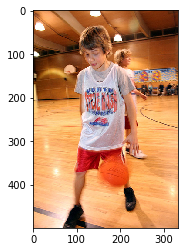

Caption: two girls are playing in the garden
_____________________________________
/content/Flicker8k_Dataset/3470951932_27ed74eb0b.jpg


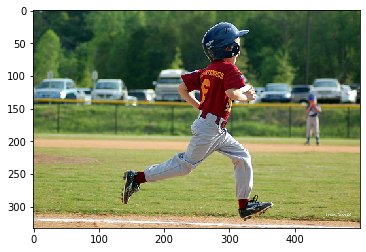

Caption: baseball player in red and white uniform is running on field
_____________________________________
/content/Flicker8k_Dataset/2317714088_bcd081f926.jpg


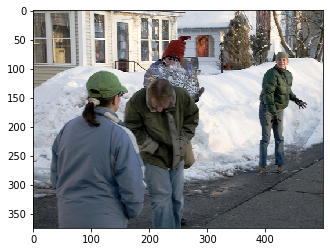

Caption: man in red jacket and hat is standing in front of type building
_____________________________________


In [47]:
for z in range(80,90):
  pic = list(encoding_test.keys())[z]
  image = encoding_test[pic].reshape((1,OUTPUT_DIM))
  print(os.path.join(root_captioning,'Flicker8k_Dataset', pic))
  x=plt.imread(os.path.join(root_captioning,'Flicker8k_Dataset', pic))
  plt.imshow(x)
  plt.show()
  print("Caption:",generateCaption(image))
  print("_____________________________________")

# z=75
# pic = list(encoding_test.keys())[z]
# image = encoding_test[pic].reshape((1,OUTPUT_DIM))
# print(os.path.join(root_captioning,'Flicker8k_Dataset', pic))
# x=plt.imread(os.path.join(root_captioning,'Flicker8k_Dataset', pic))
# plt.imshow(x)
# plt.show()
# print("Caption:",generateCaption(image))
# print("_____________________________________")